<a href="https://colab.research.google.com/github/wisnuwicaksono10/UAS_BDDM/blob/main/UAS_22_11_4728.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
df_train = pd.read_csv('/content/train_energy_data.csv')
df_train.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


In [6]:
df_train.isna().sum()

,0
Building Type,0
Square Footage,0
Number of Occupants,0
Appliances Used,0
Average Temperature,0
Day of Week,0
Energy Consumption,0


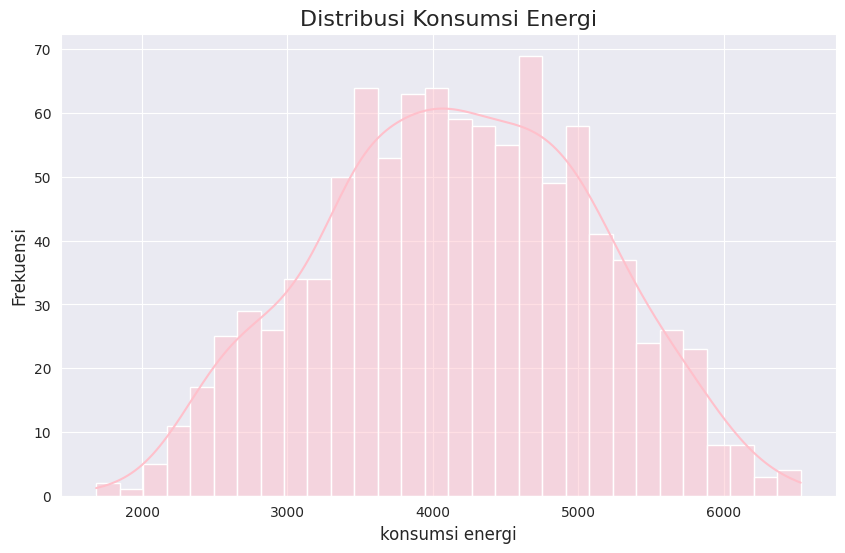

In [7]:
sns.set_style("darkgrid")

plt.figure(figsize=(10, 6))
sns.histplot(df_train['Energy Consumption'], kde=True, color='pink', bins=30)
plt.title('Distribusi Konsumsi Energi', fontsize=16)
plt.xlabel('konsumsi energi', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.show()


<ipython-input-8-465fbe0cdb6d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_train, x='Building Type', y='Energy Consumption', palette='viridis')


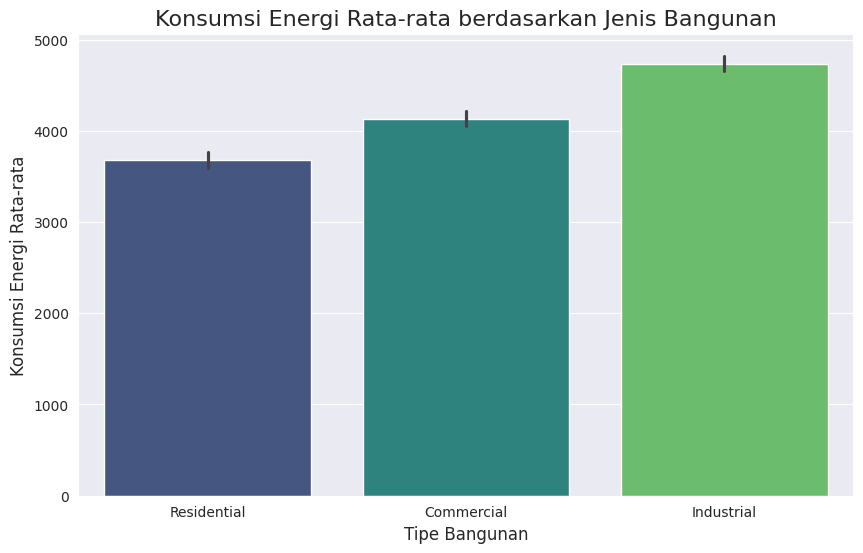

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_train, x='Building Type', y='Energy Consumption', palette='viridis')
plt.title('Konsumsi Energi Rata-rata berdasarkan Jenis Bangunan', fontsize=16)
plt.xlabel('Tipe Bangunan', fontsize=12)
plt.ylabel('Konsumsi Energi Rata-rata', fontsize=12)
plt.show()

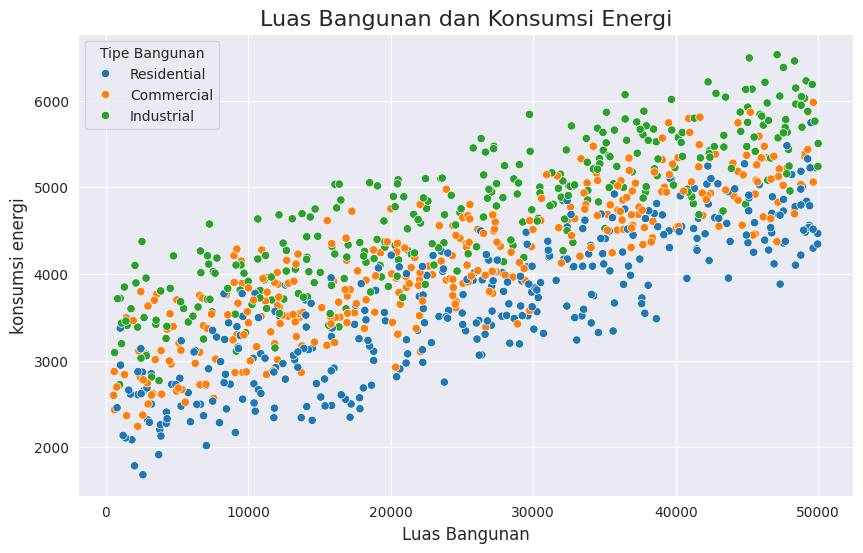

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_train, x='Square Footage', y='Energy Consumption', hue='Building Type', palette='tab10')
plt.title('Luas Bangunan dan Konsumsi Energi', fontsize=16)
plt.xlabel('Luas Bangunan', fontsize=12)
plt.ylabel('konsumsi energi', fontsize=12)
plt.legend(title='Tipe Bangunan')
plt.show()

<ipython-input-10-865db286daaf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_train, x='Day of Week', y='Energy Consumption', palette='dark')


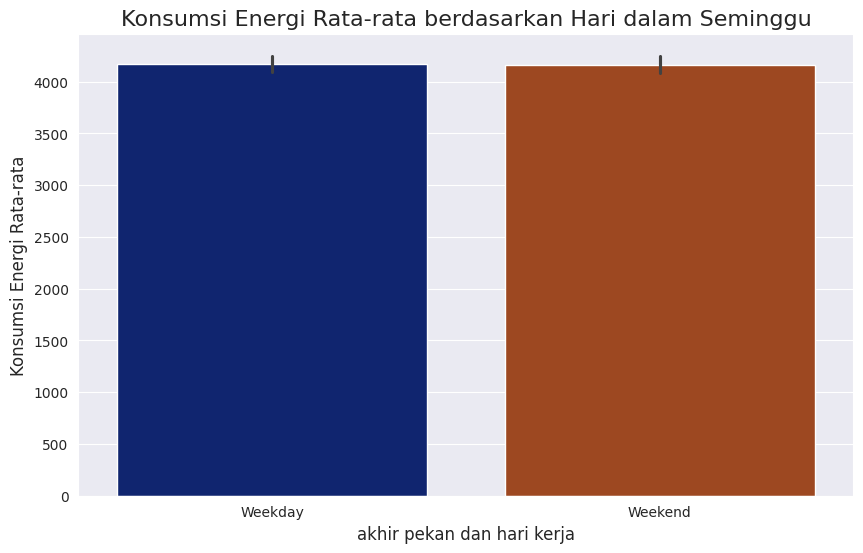

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_train, x='Day of Week', y='Energy Consumption', palette='dark')
plt.title('Konsumsi Energi Rata-rata berdasarkan Hari dalam Seminggu', fontsize=16)
plt.xlabel('akhir pekan dan hari kerja', fontsize=12)
plt.ylabel('Konsumsi Energi Rata-rata', fontsize=12)
plt.show()

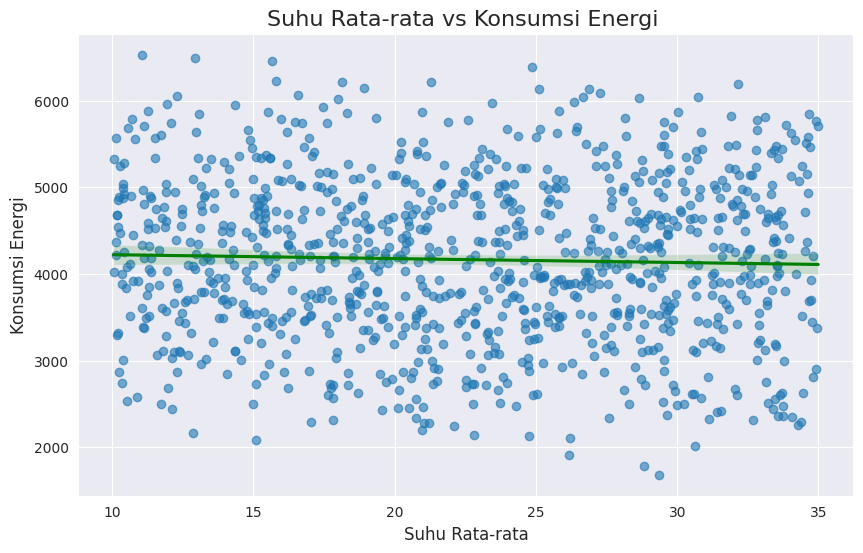

In [11]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df_train, x='Average Temperature', y='Energy Consumption', scatter_kws={'alpha':0.6}, line_kws={'color':'green'})
plt.title('Suhu Rata-rata vs Konsumsi Energi ', fontsize=16)
plt.xlabel('Suhu Rata-rata', fontsize=12)
plt.ylabel('Konsumsi Energi', fontsize=12)
plt.show()

**MODELING**

In [12]:
df_train.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17


In [13]:
df_train_encoded = pd.get_dummies(df_train, columns=['Building Type', 'Day of Week'], drop_first=True)

df_train_encoded.head()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption,Building Type_Industrial,Building Type_Residential,Day of Week_Weekend
0,7063,76,10,29.84,2713.95,False,True,False
1,44372,66,45,16.72,5744.99,False,False,False
2,19255,37,17,14.30,4101.24,True,False,True
3,13265,14,41,32.82,3009.14,False,True,False
4,13375,26,18,11.92,3279.17,False,False,False


1. Random Forest

In [14]:
X = df_train_encoded.drop(columns=['Energy Consumption'])
y = df_train_encoded['Energy Consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# RMSE
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 124.80426199609629


In [15]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV with RandomForestRegressor
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_rmse = -grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best RMSE from GridSearchCV: {best_rmse}")

# Re-training the model with the best parameters
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
print(f"RMSE after Hyperparameter Tuning: {rmse_best}")

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best RMSE from GridSearchCV: 144.8526100818724
RMSE after Hyperparameter Tuning: 125.5005830105758


**Gradient Boosting Regressor**

In [16]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))

print(f"RMSE for Gradient Boosting: {rmse_gb}")

RMSE for Gradient Boosting: 94.1682116957418


**XGBoost Regressor**

In [17]:
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f"RMSE for XGBoost: {rmse_xgb}")

RMSE for XGBoost: 111.8356719170143


In [19]:
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0]
}

grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)

grid_search_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_root_mean_squared_error')

In [20]:
# Best parameters and best score
best_params_gb = grid_search_gb.best_params_
best_rmse_gb = -grid_search_gb.best_score_

print(f"Best Hyperparameters for Gradient Boosting: {best_params_gb}")
print(f"Best RMSE from GridSearchCV: {best_rmse_gb}")

best_gb_model = grid_search_gb.best_estimator_
y_pred_best_gb = best_gb_model.predict(X_test)

# Evaluating the performance
rmse_best_gb = np.sqrt(mean_squared_error(y_test, y_pred_best_gb))
print(f"RMSE after Hyperparameter Tuning for Gradient Boosting: {rmse_best_gb}")

Best Hyperparameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.8}
Best RMSE from GridSearchCV: 83.10146808523996
RMSE after Hyperparameter Tuning for Gradient Boosting: 81.84126559560765


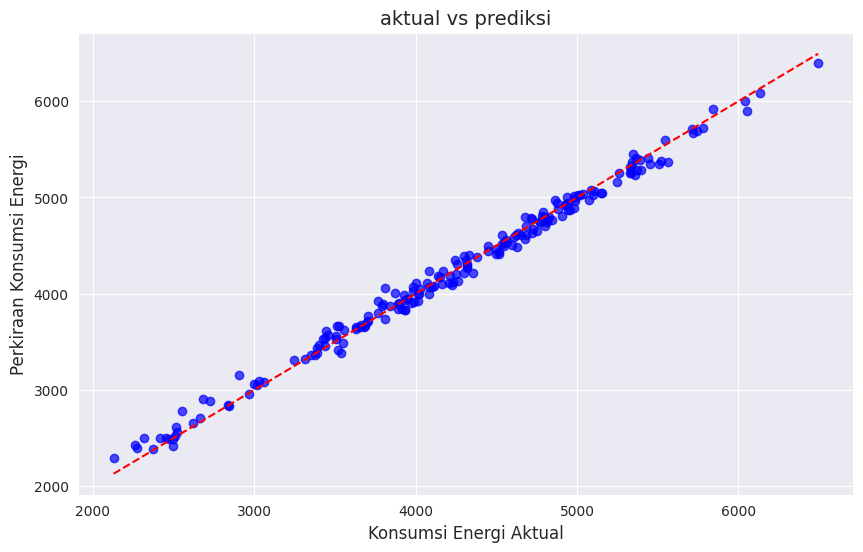

In [21]:
y_pred_final = best_gb_model.predict(X_test)

# Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_final, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.title('aktual vs prediksi', fontsize=14)
plt.xlabel('Konsumsi Energi Aktual', fontsize=12)
plt.ylabel('Perkiraan Konsumsi Energi', fontsize=12)
plt.grid(True)
plt.show()

In [22]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"RMSE for Linear Regression: {rmse_lr}")

RMSE for Linear Regression: 0.013731382133186745


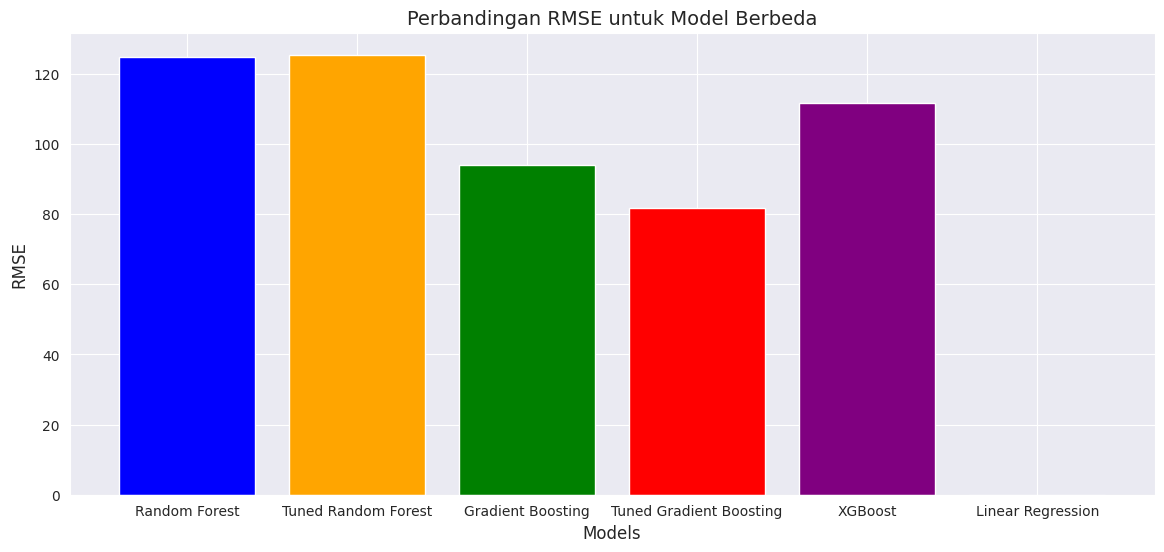

In [23]:
models = ['Random Forest', 'Tuned Random Forest', 'Gradient Boosting', 'Tuned Gradient Boosting', 'XGBoost', 'Linear Regression']
rmse_values = [124.81, 125.49, 94.17, 81.84, 111.84, 0.0137]

plt.figure(figsize=(14, 6))
plt.bar(models, rmse_values, color=['blue', 'orange', 'green', 'red', 'purple', 'cyan'])

plt.title('Perbandingan RMSE untuk Model Berbeda', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('RMSE', fontsize=12)

plt.show()

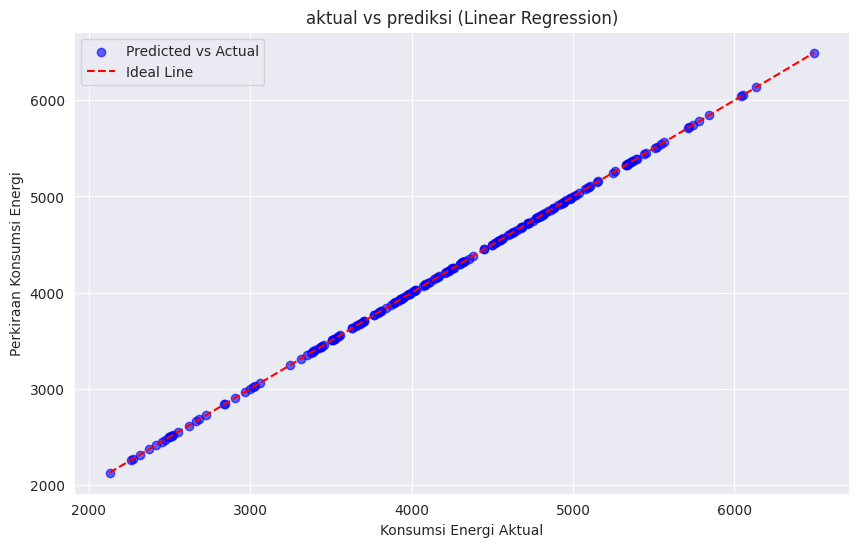

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Line')
plt.xlabel('Konsumsi Energi Aktual')
plt.ylabel('Perkiraan Konsumsi Energi')
plt.title('aktual vs prediksi (Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
df_actual_predicted_lr = pd.DataFrame({
    'Actual Energy Consumption': y_test,
    'Predicted Energy Consumption (LR)': y_pred_lr
})

print(df_actual_predicted_lr.head())

     Actual Energy Consumption  Predicted Energy Consumption (LR)
521                    4549.59                        4549.598244
737                    2842.91                        2842.901083
740                    5781.83                        5781.847788
660                    4773.54                        4773.550577
411                    3791.04                        3791.050217


# **SELEKSI** **FITUR**









In [26]:
# Melatih model RandomForest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [27]:
# Mengambil pentingnya fitur
feature_importance = rf_model.feature_importances_


In [28]:
# Menampilkan fitur dan pentingnya fitur
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Menampilkan 10 fitur teratas
print(importance_df.head(10))



                     Feature  Importance
0             Square Footage    0.624689
1        Number of Occupants    0.099525
5  Building Type_Residential    0.096973
2            Appliances Used    0.087980
4   Building Type_Industrial    0.082078
3        Average Temperature    0.007476
6        Day of Week_Weekend    0.001278


In [29]:
# Memilih fitur dengan pentingnya lebih besar dari 0.05
selected_features = importance_df[importance_df['Importance'] > 0.05]['Feature']
X_selected = X[selected_features]

# Menampilkan fitur terpilih
print("Fitur yang terpilih:", selected_features)


Fitur yang terpilih: 0               Square Footage
1          Number of Occupants
5    Building Type_Residential
2              Appliances Used
4     Building Type_Industrial
Name: Feature, dtype: object


In [30]:
# Membagi data dengan fitur terpilih
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Melatih ulang model dengan fitur terpilih
rf_model_selected = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_selected.fit(X_train_selected, y_train_selected)

# Memprediksi dan menghitung RMSE untuk model terpilih
y_pred_selected = rf_model_selected.predict(X_test_selected)
rmse_selected = np.sqrt(mean_squared_error(y_test_selected, y_pred_selected))

print(f"RMSE setelah seleksi fitur: {rmse_selected}")


RMSE setelah seleksi fitur: 117.78193291369337


In [31]:
import joblib

# Menyimpan model terbaik setelah hyperparameter tuning
joblib.dump(best_rf_model, 'best_rf_model.joblib')

# Menyimpan model Linear Regression
joblib.dump(lr_model, 'lr_model.joblib')




['lr_model.joblib']

In [ ]:
!git init

Reinitialized existing Git repository in /content/.git/


In [ ]:
!git config --global user.email "wisnuwicaksana100@students.amikom.ac.id"
!git config --global user.name "wisnuwicaksono10"


In [ ]:
!git add .

In [ ]:
!git status

On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)
	new file:   .config/.last_opt_in_prompt.yaml
	new file:   .config/.last_survey_prompt.yaml
	new file:   .config/.last_update_check.json
	new file:   .config/active_config
	new file:   .config/config_sentinel
	new file:   .config/configurations/config_default
	new file:   .config/default_configs.db
	new file:   .config/gce
	new file:   .config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
	new file:   .config/logs/2025.01.15/14.24.33.570214.log
	new file:   .config/logs/2025.01.15/14.24.53.360583.log
	new file:   .config/logs/2025.01.15/14.25.00.998106.log
	new file:   .config/logs/2025.01.15/14.25.02.096828.log
	new file:   .config/logs/2025.01.15/14.25.10.736082.log
	new file:   .config/logs/2025.01.15/14.25.11.351475.log
	new file:   best_rf_model.joblib
	new file:   lr_model.joblib
	new file:   sample_data/README.md
	new file:   sample_data/anscombe.json
	new f

In [ ]:
!git commit -m "terbaru"

[master (root-commit) 5cd865c] terbaru
 24 files changed, 52024 insertions(+)
 create mode 100644 .config/.last_opt_in_prompt.yaml
 create mode 100644 .config/.last_survey_prompt.yaml
 create mode 100644 .config/.last_update_check.json
 create mode 100644 .config/active_config
 create mode 100644 .config/config_sentinel
 create mode 100644 .config/configurations/config_default
 create mode 100644 .config/default_configs.db
 create mode 100644 .config/gce
 create mode 100644 .config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
 create mode 100644 .config/logs/2025.01.15/14.24.33.570214.log
 create mode 100644 .config/logs/2025.01.15/14.24.53.360583.log
 create mode 100644 .config/logs/2025.01.15/14.25.00.998106.log
 create mode 100644 .config/logs/2025.01.15/14.25.02.096828.log
 create mode 100644 .config/logs/2025.01.15/14.25.10.736082.log
 create mode 100644 .config/logs/2025.01.15/14.25.11.351475.log
 create mode 100644 best_rf_model.joblib
 create mode 100644 lr_mo

In [ ]:
!git branch -M main

In [ ]:
!git remote add origin https://github.com/wisnuwicaksono10/UAS_BDDM.git

In [ ]:
!git commit -m "terbaru"

[main (root-commit) ba02cfc] terbaru
 24 files changed, 52024 insertions(+)
 create mode 100644 .config/.last_opt_in_prompt.yaml
 create mode 100644 .config/.last_survey_prompt.yaml
 create mode 100644 .config/.last_update_check.json
 create mode 100644 .config/active_config
 create mode 100644 .config/config_sentinel
 create mode 100644 .config/configurations/config_default
 create mode 100644 .config/default_configs.db
 create mode 100644 .config/gce
 create mode 100644 .config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
 create mode 100644 .config/logs/2025.01.15/14.24.33.570214.log
 create mode 100644 .config/logs/2025.01.15/14.24.53.360583.log
 create mode 100644 .config/logs/2025.01.15/14.25.00.998106.log
 create mode 100644 .config/logs/2025.01.15/14.25.02.096828.log
 create mode 100644 .config/logs/2025.01.15/14.25.10.736082.log
 create mode 100644 .config/logs/2025.01.15/14.25.11.351475.log
 create mode 100644 best_rf_model.joblib
 create mode 100644 lr_mode

Enumerating objects: 31, done.
Counting objects: 100% (31/31), done.
Delta compression using up to 2 threads
Compressing objects: 100% (24/24), done.
Writing objects: 100% (31/31), 9.73 MiB | 1.81 MiB/s, done.
Total 31 (delta 4), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (4/4), done.
To https://github.com/wisnuwicaksono10/UAS_BDDM.git
 * [new branch]      main -> main
